<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/Nyoba_2_RF_Regresi_Feature_Importance_%5BData_Carprice%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jcopml

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease
from jcopml.plot import plot_missing_value, plot_confusion_matrix, plot_correlation_matrix
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp

sns.set()

In [3]:
datas = pd.read_csv("/content/carprice.csv", index_col='ID')
datas.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [4]:
def encode_merk(x):
  return x.split()[0]

In [5]:
datas['Merk'] = datas.Name.apply(encode_merk)

In [6]:
X = datas.drop(columns=['Name', 'Price'])
y = datas.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4762, 11), (1191, 11))

In [7]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(impute='most_frequent', encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Merk']),
    ('numeric', num_pipe(impute='median'), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp',
       'Seats'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

In [8]:
gsp.rf_params

{'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10],
 'algo__n_estimators': [100, 150, 200]}

In [ ]:
params = {
  'algo__max_depth': [20, 30],
  'algo__max_features': [0.8, 0.5],
  'algo__min_samples_leaf': [3, 5],
  'algo__n_estimators': [125, 150]
 }

model = GridSearchCV(pipeline, param_grid=params, cv=3, verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

In [17]:
model.score(X_train, y_train), model.score(X_test, y_test), model.best_params_

(0.9547857309635988,
 0.8621307657948886,
 {'algo__max_depth': 30,
  'algo__max_features': 0.5,
  'algo__min_samples_leaf': 3,
  'algo__n_estimators': 125})

# Mean Loss Decrease khusus untuk Tree Based

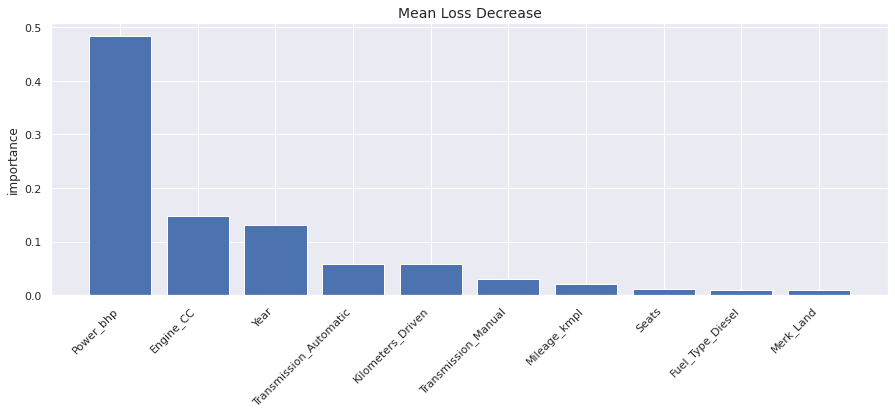

In [18]:
df_imp = mean_loss_decrease(X_train, model, plot=True, topk=10)

# Mean Score Decrease untuk semua model

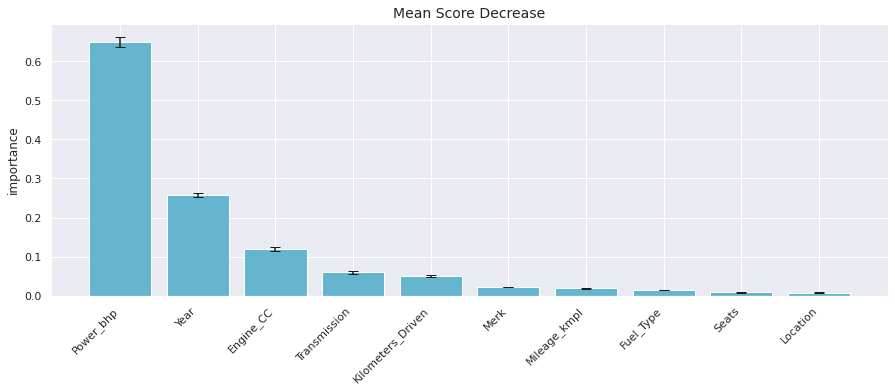

In [19]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)